# SVM


In [1]:

import pandas as pd
df=pd.read_csv('train_titanic.csv')

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [8]:
print(df['Survived'].unique())


[0 1]


/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


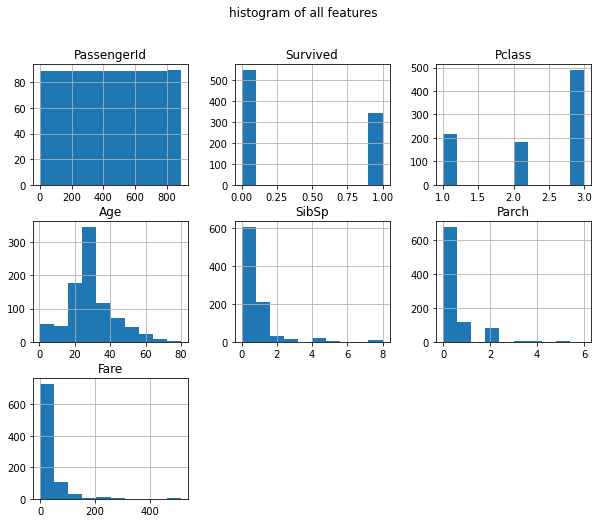

In [9]:
# plot for all featured values
import matplotlib.pyplot as plt

df.hist(figsize=(10,8))
plt.suptitle("histogram of all features")
plt.show()

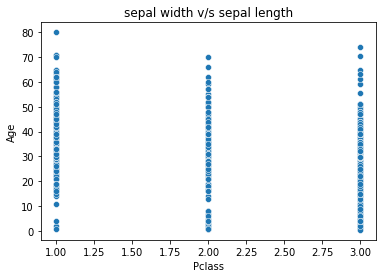

In [12]:
#scatter plot for age and pclass
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(data=df,y='Age',x='Pclass')
plt.title("sepal width v/s sepal length")

plt.show()

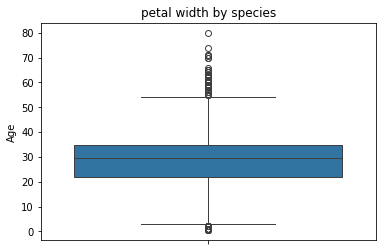

In [13]:
#box plot

sns.boxplot(data=df,y='Age')
plt.title('petal width by species')
plt.show()

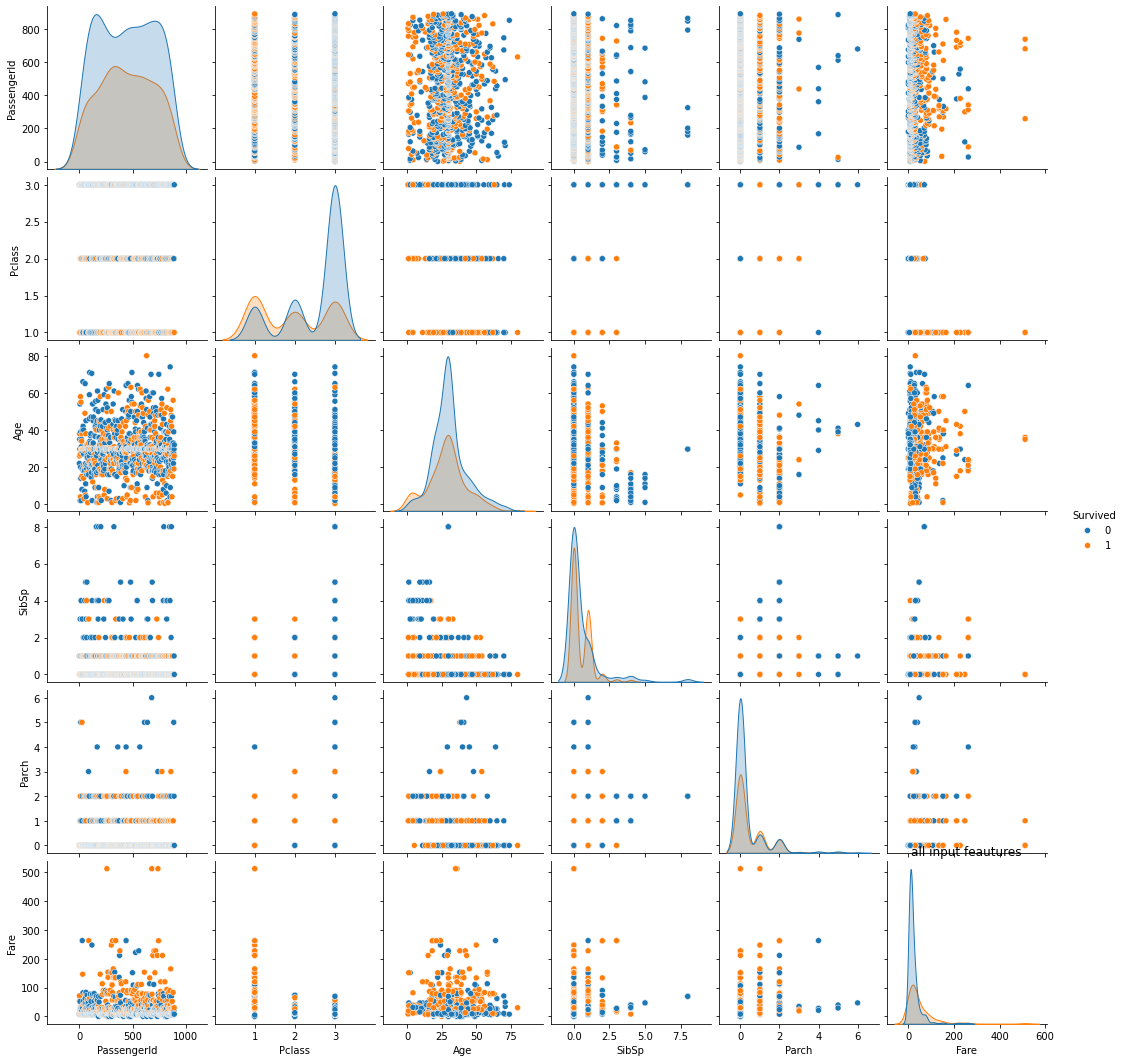

In [14]:
#PAIRPLOT


sns.pairplot(data=df,hue='Survived')
plt.title("all input feautures")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat=df.select_dtypes(include=['object']).columns
for col in cat:
    df[col]=le.fit_transform(df[col])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


In [20]:
#print correlation among different feautures

y=df['Survived']
x=df.drop(columns=['Survived'])

In [19]:
print(x.corr())

             PassengerId    Pclass      Name       Sex       Age     SibSp  \
PassengerId     1.000000 -0.035144 -0.038559  0.042939  0.033207 -0.057527   
Pclass         -0.035144  1.000000  0.052831  0.131900 -0.331339  0.083081   
Name           -0.038559  0.052831  1.000000  0.020314  0.057466 -0.017230   
Sex             0.042939  0.131900  0.020314  1.000000  0.084153 -0.114631   
Age             0.033207 -0.331339  0.057466  0.084153  1.000000 -0.232625   
SibSp          -0.057527  0.083081 -0.017230 -0.114631 -0.232625  1.000000   
Parch          -0.001652  0.018443 -0.049105 -0.245489 -0.179191  0.414838   
Ticket         -0.056554  0.319869  0.047348  0.059372 -0.068848  0.079461   
Fare            0.012658 -0.549500 -0.049173 -0.182333  0.091566  0.159651   
Cabin          -0.035077  0.684121  0.061959  0.096681 -0.235406  0.043593   
Embarked        0.013083  0.157112 -0.004557  0.104057 -0.022239  0.066654   

                Parch    Ticket      Fare     Cabin  Embarked  

In [22]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 11), (268, 11), (623,), (268,))

In [24]:

from sklearn.svm import SVC
model=SVC(C=1)
model.fit(x_train,y_train)

SVC(C=1)

In [25]:
y_pred=model.predict(x_test)

In [26]:
#accuracy,confusion matrix,classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ac=accuracy_score(y_test,y_pred)
classify=classification_report(y_test,y_pred)
con=confusion_matrix(y_pred,y_test)
print(f"acc:{ac}")
print("class",classify)
print("con",con)


acc:0.6529850746268657
class               precision    recall  f1-score   support

           0       0.63      0.96      0.76       157
           1       0.80      0.22      0.34       111

    accuracy                           0.65       268
   macro avg       0.72      0.59      0.55       268
weighted avg       0.70      0.65      0.59       268

con [[151  87]
 [  6  24]]


In [27]:
#KFOld Gridsearch
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
kfold=KFold(n_splits=5)
cross=cross_val_score(model,x,y,cv=kfold)
print(cross.mean())


0.6655263323080786


In [28]:
##  GridSearchCV for best C value
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid_model = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_model.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True)